# EDA NOTEBOOK

- Contains summary statistics (univariate/bivariate) of all the features across the various datasets we have
- Also contains turnover specific information like the spread of attrition over years and months
- A few plots have been included to paint a better picture for some insights

### Next steps being worked on in parallel to the modelling framework:
- Include more bivariate analyses across categorical vs continuous and other dimensions
- Include better plots and make the functions more dynamic with respect to functionalities
- Make it an automated, modularized notebook that can be leveraged for any data analyses contexts

In [106]:
# clear the workspace
%reset -f

import pandas as pd
import numpy as np
#import xgboost as xgb
import pickle, collections
from sklearn.preprocessing import LabelEncoder

# print list of files in directory
import os
print(os.listdir())

# print/display all plots inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns=100
pd.options.display.max_rows=1000

['.ipynb_checkpoints', '.svn', '2. Target Risk Analysis - Univariates, Bivariates and Missing Value Treatment.py', '3 month iteration results', 'archive', 'barplots.ipynb', 'branches', 'FEATURE_ENGINEERING.ipynb', 'final_distribution.png', 'friday_meeting.csv', 'JUNE18_TURNOVER.xlsx', 'MAIN.ipynb', 'MODEL_SELECTION_TUNING_TEST_2017Dec_model3.ipynb', 'MODEL_TOP_FEATURES_DISTRIBUTION_Graphs.ipynb', 'NAZ_missing_distribution.csv', 'New folder', 'OTHER_MODELS.ipynb', 'pred.csv', 'preparation', 'salary_bonus_2017.csv', 'snippets', 'stacking_ensemble', 'tags', 'test_final.csv', 'train_final.csv', 'trunk', 'Turnover Report NAZ 2017 Year End.xlsx', 'turnover-2015-final.csv', 'turnover-2016-final.csv', 'turnover_framework', 'ULTIMATE-Copy1.ipynb', 'ULTIMATE.ipynb', 'valid_final.csv', 'VERTICAL LEVEL MODELS', 'wrong', 'X_train.csv', 'X_valid.csv', 'y_valid.csv', '~$Turnover Report NAZ 2017 Year End.xlsx']


In [107]:
def csv_read(file_path, cols_to_remove=None):
    x=pd.read_csv(file_path, na_values=['No Data', ' ', 'UNKNOWN'])
    print(x.shape)
    if cols_to_remove is not None: x.drop(cols_to_remove, axis = 1, inplace = True)
    chars_to_remove = [' ', '.', '(', ')', '__', '-']
    for i in chars_to_remove:
        x.columns = x.columns.str.strip().str.lower().str.replace(i, '_')
    return x

def xlsx_read(file_path, cols_to_remove=None):
    x=pd.read_excel(file_path, na_values=['No Data', ' ', 'UNKNOWN'])
    print(x.shape)
    if cols_to_remove is not None: x.drop(cols_to_remove, axis = 1, inplace = True)
    chars_to_remove = [' ', '.', '(', ')', '__', '-']
    for i in chars_to_remove:
        x.columns = x.columns.str.strip().str.lower().str.replace(i, '_')
    return x

cols_to_remove = ['global id', 'pers. subarea text',
                                                  'manager global id', 'personnel number manager', 
                                                  'short text of organizational unit', 'position text', 
                                                  'physical work location-description', 'physical work location-city',
                                                  'manager position desc', 'costcenter description',
                                                  'local entity description', 'appraiser id']

In [108]:
train=csv_read(file_path='train_final.csv', cols_to_remove=cols_to_remove)
test=csv_read(file_path='test_final.csv', cols_to_remove=cols_to_remove)
valid=csv_read(file_path='valid_final.csv', cols_to_remove=cols_to_remove)

(6102, 92)
(5897, 92)
(5734, 92)


In [109]:
# the dimensions of the response variable

print(collections.Counter(train['label']))
print(collections.Counter(test['label']))
print(collections.Counter(valid['label']))

Counter({0: 5811, 1: 291})
Counter({0: 5616, 1: 281})
Counter({0: 5453, 1: 281})


In [110]:
def num_missing(self):
    return sum(self.isnull())
train_miss=train.apply(num_missing, axis=0)
test_miss=test.apply(num_missing, axis=0)
valid_miss=valid.apply(num_missing, axis=0)
missing = pd.DataFrame({'dec16': train_miss, 'june17': test_miss, 'dec17': valid_miss}) # display count of NAs per column
missing['dec16_perc'] = 100*(missing['dec16']/train.shape[0])
missing['june17_perc'] = 100*(missing['june17']/test.shape[0])
missing['dec17_perc'] = 100*(missing['dec17']/valid.shape[0])

missing.index.name = 'columns'
missing.reset_index(inplace=True)

missing.to_csv('NAZ_missing_distribution.csv', index=False)

In [112]:
missing

,columns,dec16,june17,dec17,dec16_perc,june17_perc,dec17_perc
0,abinbev_entity2,0,2,0,0.000000,0.033916,0.000000
1,abinbev_entity3,3477,3242,3045,56.981318,54.977107,53.104290
2,abinbev_entity4,5401,5132,4979,88.511963,87.027302,86.832926
3,age,209,10,362,3.425107,0.169578,6.313219
4,age_diff,328,71,533,5.375287,1.204002,9.295431
5,annual_salary,1069,1347,1654,17.518846,22.842123,28.845483
6,bonus_comparison,1841,1357,1659,30.170436,23.011701,28.932682
7,bonus_comparison_team,1904,1447,1757,31.202884,24.537901,30.641786
8,bonus_comparison_team2,1910,1387,1688,31.301213,23.520434,29.438437
9,bonus_total,1069,1347,1654,17.518846,22.842123,28.845483


In [122]:
# turnover summary

leavers_15 = csv_read('turnover-2015-final.csv')
leavers_16 = csv_read('turnover-2016-final.csv')
leavers_17 = xlsx_read('Turnover Report NAZ 2017 Year End.xlsx')
leavers_18 = xlsx_read('JUNE18_TURNOVER.xlsx')

(1231, 40)
(1399, 42)
(6160, 96)
(782, 87)


In [123]:
# subsetting relevant columns alone from the turnover files, and creating a singular LEAVERS dataset

cols_to_subset = ['global_id', 'termination_month', 'termination_year', 'original_hire_date', 'gender',
                  'name_of_action_type', 'name_of_reason_for_action', 'pay_scale_group']

leavers_15_df = leavers_15[cols_to_subset]
leavers_16_df = leavers_16[cols_to_subset]
leavers_17_df = leavers_17[cols_to_subset]
leavers_18_df = leavers_18[cols_to_subset]

all_leavers = pd.concat([leavers_15_df, leavers_16_df, leavers_17_df, leavers_18_df], ignore_index=True)

In [124]:
# printing the distributions across the various year level turnover files
# performing some filtering to subset only the people relevant to us in the Turnover scope

print(leavers_15_df.shape)
print(leavers_16_df.shape)
print(leavers_17_df.shape)
print(leavers_18_df.shape)
print(all_leavers.shape)

psg_list = ['VI-A', 'VIII-B','V-B','VI-B','X-A','VII-B','IV-B','XI-A','IX-B','VII-A','IX-A','IV-A','V-A','III-B',
            'II-A','X-B','VIII-A','XI-B','II-B','I-B','0-B','III-A','I-A']
all_leavers = all_leavers.loc[all_leavers['pay_scale_group'].isin(psg_list)]
all_leavers = all_leavers[all_leavers['name_of_action_type'] == 'Termination-Voluntary']
all_leavers = all_leavers[all_leavers['name_of_reason_for_action'] == 'Resignation - Personal reason']
all_leavers = all_leavers[all_leavers['termination_year'] > 2014]
all_leavers.sort_values(by='termination_year', ascending=True, inplace=True)
all_leavers.drop_duplicates(subset='global_id', keep='last', inplace=True)
all_leavers.reset_index(inplace=True, drop=True)
all_leavers['original_hire_date'] = pd.to_datetime(all_leavers['original_hire_date'])
all_leavers.shape
all_leavers.drop(['name_of_action_type', 'name_of_reason_for_action', 'pay_scale_group'], axis=1, inplace=True)

(1231, 8)
(1399, 8)
(6160, 8)
(782, 8)
(9572, 8)


In [128]:
# mapping the termination month to month names

d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

all_leavers['termination_month'] = all_leavers['termination_month'].astype(str).str.replace(r"[^A-Za-z]+", '').str.lower()
all_leavers['term_month'] = all_leavers.termination_month.map(d)

In [129]:
from IPython.display import display, HTML

print('Total unique leavers from 2015 to 2018 June is the unique count of global ids below: ')
display(pd.DataFrame({'unique count': all_leavers.nunique()}))

Total unique leavers from 2015 to 2018 June is the unique count of global ids below: 


,unique count
global_id,1585
termination_month,12
termination_year,4
original_hire_date,840
gender,2
term_month,12


'The number of leavers per year is: '

,leavers
2015,1
2016,554
2017,719
2018,311


'The number of leavers per month is: '

,term_month,termination_month,leavers
0,1,jan,157
1,2,feb,117
2,3,mar,150
3,4,apr,153
4,5,may,185
5,6,jun,176
6,7,jul,129
7,8,aug,127
8,9,sep,90
9,10,oct,115


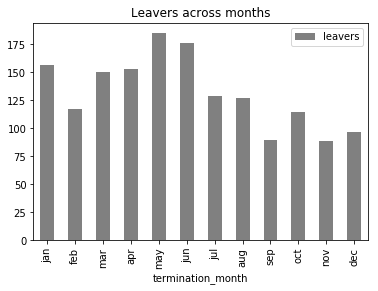

In [153]:
## summary

leavers_per_year = pd.DataFrame({'leavers':collections.Counter(all_leavers.termination_year)})
display('The number of leavers per year is: ', leavers_per_year)
print('\n')

lpm = all_leavers[['termination_month', 'term_month']]
leavers_per_month = (lpm.groupby(['term_month', 'termination_month'])
                     .agg({'termination_month': 'count'})
                     .rename(columns = {'termination_month': 'leavers'})
                     .reset_index())
display('The number of leavers per month is: ', leavers_per_month)

%matplotlib inline
leavers_per_month.plot(x='termination_month', y='leavers', kind='bar', color = 'grey', title='Leavers across months')

'The number of leavers per year month is: '

,termination_year,term_month,termination_month,leavers
0,2015,4,apr,1
1,2016,1,jan,32
2,2016,2,feb,31
3,2016,3,mar,37
4,2016,4,apr,45
5,2016,5,may,47
6,2016,6,jun,50
7,2016,7,jul,57
8,2016,8,aug,63
9,2016,9,sep,48


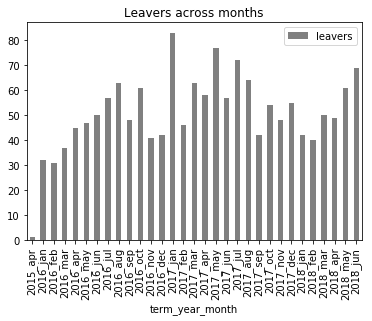

In [158]:
lpm2 = all_leavers[['termination_year', 'termination_month', 'term_month']]
leavers_per_year_month = (lpm2.groupby(['termination_year', 'term_month', 'termination_month'])
                     .agg({'termination_month': 'count'})
                     .rename(columns = {'termination_month': 'leavers'})
                     .reset_index())
display('The number of leavers per year month is: ', leavers_per_year_month)

leavers_per_year_month['term_year_month'] = leavers_per_year_month['termination_year'].astype('str') + '_' + leavers_per_year_month['termination_month']
leavers_per_year_month.plot(x='term_year_month', y='leavers', kind='bar', color = 'grey', title='Leavers across months')

In [133]:
#define a function to return all the stats required for univariate analysis of continuous variables
def univariate_stats_continuous(df_raw_data, var_cont):

    #for each column, check the following -> 1) number of rows in each variable, 2) number of rows with missing values and 3) % of rows with missing values
    df_variable_stats = pd.DataFrame(df_raw_data[var_cont].dtypes).T.rename(index={0:'column type'})
    df_variable_stats = df_variable_stats.append(pd.DataFrame(df_raw_data[var_cont].isnull().sum()).T.rename(index={0:'null values (nb)'}))
    df_variable_stats = df_variable_stats.append(pd.DataFrame(df_raw_data[var_cont].isnull().sum()/df_raw_data[var_cont].shape[0])
                             .T.rename(index={0:'null values (%)'}))
    
    #get stats for every continuous variable 
    df_variable_stats = df_variable_stats.append(df_raw_data[var_cont].agg(['count', 'size', 'nunique', 'mean','median','std', 'var', 'skew', 'kurtosis', 'min', 'max']))
    
    #get mode for every variable - manual since there were some unresolved errors
    temp_list_1 = []
    temp_list_2 = []
    for i in list(df_raw_data[var_cont].columns):
        #print(i)
        temp_list_1.append(df_raw_data[i].mode()[0])
        temp_list_2.append(i)
    temp_list_1 = pd.Series(temp_list_1)
    temp_list_1.index = temp_list_2
    temp_list_1.name = 'mode'
    
    df_variable_stats = df_variable_stats.append(pd.DataFrame(temp_list_1).T)

    def return_percentile(df_name, percentile_array, index_array):
        """
        This function returns different percentiles for all the columns of a given DataFrame
        This function is built to function only for continuous variables
        """
        df_quantile = df_name.quantile(percentile_array)
        df_quantile['rows'] = index_array
        df_quantile = df_quantile.reset_index()
        df_quantile.drop('index', axis=1, inplace=True)
        df_quantile.set_index(['rows'], inplace=True)
        
        return df_quantile
    
    percentile_array = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.25,0.3,0.33,0.4,0.5,0.6,0.66,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]
    index_array = ['0%','1%','2%','3%','4%','5%','6%','7%','8%','9%','10%','20%','25%','30%','33%','40%','50%','60%','66%','70%','75%','80%','90%','91%','92%','93%','94%','95%','96%','97%','98%','99%','100%']
    
    df_quantile = return_percentile(df_raw_data[var_cont], percentile_array, index_array)

    df_variable_stats = df_variable_stats.append(df_quantile).T

    df_variable_stats.reset_index(inplace=True)
    df_variable_stats.drop('column type', axis=1, inplace=True)
    df_variable_stats.dtypes
    
    df_variable_stats = df_variable_stats[['index','nunique','null values (nb)','null values (%)','mean','median','mode','std','var','max','min','count','kurtosis','skew','0%','1%','2%','3%','4%','5%','6%','7%','8%','9%','10%','20%','25%','30%','33%','40%','50%','60%','66%','70%','75%','80%','90%','91%','92%','93%','94%','95%','96%','97%','98%','99%','100%']]
    df_variable_stats.columns = ['Variable','Unique values','Missing values','Missing percent','Mean','Median','Mode','Std. Dev.','Variance','Max','Min','Range','Kurtosis','Skewness','0%','1%','2%','3%','4%','5%','6%','7%','8%','9%','10%','20%','25%','30%','33%','40%','50%','60%','66%','70%','75%','80%','90%','91%','92%','93%','94%','95%','96%','97%','98%','99%','100%']

    #return the final dataframe containing stats for continuous variables
    return df_variable_stats

In [134]:
var_cont = train.select_dtypes(include=['int64', 'float64']).columns.values

df_stats_1 = univariate_stats_continuous(df_raw_data=train, var_cont=var_cont)

In [135]:
df_stats_1

,Variable,Unique values,Missing values,Missing percent,Mean,Median,Mode,Std. Dev.,Variance,Max,Min,Range,Kurtosis,Skewness,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,20%,25%,30%,33%,40%,50%,60%,66%,70%,75%,80%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
0,original_id,6102,0,0,1.01175e+07,1.02889e+07,6.10014e+06,4.48135e+06,2.00825e+13,9.97904e+07,6.10014e+06,6102,343.943,17.6258,6.10014e+06,7.04842e+06,7.05852e+06,7.07456e+06,7.07655e+06,7.09066e+06,7.09181e+06,7.09284e+06,7.09354e+06,7.09415e+06,7.09478e+06,1.0008e+07,1.00421e+07,1.00574e+07,1.0092e+07,1.01746e+07,1.02889e+07,1.03075e+07,1.07032e+07,1.0705e+07,1.07072e+07,1.07092e+07,1.07129e+07,1.07133e+07,1.07137e+07,1.09901e+07,1.09907e+07,1.09917e+07,1.09922e+07,1.09927e+07,1.09937e+07,1.09942e+07,9.97904e+07
1,label,2,0,0,0.0476893,0,0,0.213125,0.0454225,1,0,6102,16.0333,4.24594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2,service_months,2342,100,0.0163881,104.843,58.5803,11.3678,107.732,11606.3,486.121,0.328549,6002,0.45247,1.18245,0.328549,2.23413,2.98979,3.61404,4.76396,4.99394,5.62213,6.37385,6.83382,7.52377,8.01659,16.2632,20.14,25.6925,30.5222,41.3117,58.5803,89.6281,119.526,139.262,166.837,198.641,278.445,291.614,303.465,315.992,326.282,335.898,348.125,360.549,378.944,411.996,486.121
3,age,4569,209,0.0342511,38.2771,35.6284,27.7569,11.0193,121.425,72.5107,19.7759,5893,-0.772038,0.599199,19.7759,23.157,23.6238,24.0101,24.3328,24.6346,24.9219,25.2106,25.4272,25.7183,26.0178,27.7569,28.7398,29.9839,30.6998,32.5636,35.6284,39.0015,41.7914,43.9544,46.7662,49.7839,55.4475,55.86,56.4957,57.2996,57.89,58.5496,59.3743,60.0576,61.0891,63.1476,72.5107
4,manager_service_months,883,135,0.0221239,146.271,128.725,59.5659,101.562,10314.7,473.702,0.985647,5967,-0.341266,0.66382,0.985647,2.98979,8.01659,9.00224,11.3087,12.6327,16.0963,19.6801,21.0271,24.5091,30.7522,53.2906,59.5659,66.8597,71.6894,107.731,128.725,158.919,175.872,191.873,211.027,237.041,297.797,305.813,313.994,323.752,333.641,341.461,351.482,363.999,371.819,400.121,473.702
5,manager_age,1147,187,0.0306457,40.4588,38.9851,27.7569,9.28358,86.1849,72.5107,23.661,5915,-0.712148,0.395731,23.661,25.2326,26.2784,27.0314,27.3188,27.6939,27.7569,27.7569,27.7569,27.9157,28.1983,31.7214,33.3641,34.5173,35.2395,36.7893,38.9851,41.9228,44.2062,45.4657,47.4315,49.359,54.279,54.7527,55.2099,55.7739,56.6227,57.4139,57.6877,58.1011,59.4947,60.954,72.5107
6,age_diff,4727,328,0.0537529,2.24929,2.65714,0,12.5592,157.732,39.0261,-44.7538,5774,0.259731,-0.241656,-44.7538,-29.5578,-26.1054,-24.2477,-22.2377,-20.886,-19.5995,-17.9789,-16.7674,-15.6608,-14.552,-7.26312,-4.86458,-2.72504,-1.62185,0,2.65714,5.45884,7.30572,8.5806,10.1528,11.8644,17.7805,18.5978,19.4504,20.503,21.4329,22.6565,24.3336,25.5994,27.5127,30.8314,39.0261
7,position,6056,0,0,1.85192e+07,1.04452e+07,1.00142e+07,2.17765e+07,4.74217e+14,9.5e+07,1.00029e+07,6102,5.26812,2.58255,1.00029e+07,1.00062e+07,1.00123e+07,1.00146e+07,1.00487e+07,1.01296e+07,1.03045e+07,1.03052e+07,1.0306e+07,1.03072e+07,1.03075e+07,1.03142e+07,1.03155e+07,1.03179e+07,1.03188e+07,1.03606e+07,1.04452e+07,1.0496e+07,1.05121e+07,1.05155e+07,1.05266e+07,1.05705e+07,5.03666e+07,5.03836e+07,5.03839e+07,5.03912e+07,9.00054e+07,9.0006e+07,9.00145e+07,9.00193e+07,9.00443e+07,9.00486e+07,9.5e+07
8,manager_position,1287,0,0,2.86838e+07,1.04761e+07,5.03903e+07,3.15952e+07,9.98256e+14,9.00516e+07,1.00043e+07,6102,-0.191964,1.27788,1.00043e+07,1.00133e+07,1.00151e+07,1.00679e+07,1.01468e+07,1.03046e+07,1.03057e+07,1.03073e+07,1.03081e+07,1.03089e+07,1.03092e+07,1.03154e+07,1.03164e+07,1.03202e+07,1.03644e+07,1.04098e+07,1.04761e+07,1.05142e+07,1.0525e+07,1.05706e+07,5.03183e+07,5.03903e+07,9.00443e+07,9.00483e+07,9.00483e+07,9.00484e+07,9.00484e+07,9.00485e+07,9.00486e+07,9.00488e+07,9.00508e+07,9.00513e+07,9.00516e+07
9,ebm_level_of_the_job,7,0,0,4.80908,5,5,1.09645,1.20219,7,1,6102,-0.225163,-0.098461,1,2,3,3,3,3,3,3,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7


In [136]:
#define a function to return all the stats required for univariate analysis of continuous variables
def univariate_stats_categorical(df_raw_data, var_catg):

    #get the unique values of the variables
    df_catg_nunique = df_raw_data[var_catg].nunique().reset_index()
    df_catg_nunique.columns = ['Variable', 'unique_values']
    
    #get the population for different observations of each variable
    df_catg_population = pd.DataFrame(columns = ['Variable', 'Level', 'Population'])
    
    for i in df_raw_data[var_catg].columns:
        df_temp = pd.DataFrame(df_raw_data[i].value_counts()).reset_index()
        df_temp['Variable'] = i
        df_temp = df_temp[['Variable', 'index', i]]
        df_temp.columns = ['Variable', 'Level', 'Population']
        df_catg_population = df_catg_population.append(df_temp)
    
    #merge the population and unique counts
    df_catg_stats = pd.merge(df_catg_population, df_catg_nunique, on = 'Variable', how = 'left')

    df_catg_stats['Population %'] = df_catg_stats.groupby(['Variable'])['Population'].apply(lambda x: 100 * x / float(x.sum()))

    return df_catg_stats

In [137]:
var_cat = train.select_dtypes(include=['object']).columns.values

df_stats_2 = univariate_stats_categorical(df_raw_data=train, var_catg=var_cat)

In [138]:
df_stats_2.head(20)

,Variable,Level,Population,unique_values,Population %
0,pay_scale_group,VI-B,964,18,15.7981
1,pay_scale_group,VII-B,780,18,12.7827
2,pay_scale_group,VI-A,754,18,12.3566
3,pay_scale_group,IX-A,719,18,11.783
4,pay_scale_group,VII-A,639,18,10.472
5,pay_scale_group,VIII-B,598,18,9.80007
6,pay_scale_group,V-B,530,18,8.68568
7,pay_scale_group,V-A,291,18,4.76893
8,pay_scale_group,IX-B,236,18,3.86758
9,pay_scale_group,VIII-A,227,18,3.72009


In [139]:
from tqdm import tqdm

#create a function to give average value of dependent variable for every observation of categorical variables
def bivariate_stats_categorical(df_raw_data, var_catg, var_dependent):
    global iter
    iter = 0
    all_cols = pd.DataFrame(columns = ['col', 'level', 'mean', 'std'])
    for i in tqdm(var_catg):
        grouped_df = pd.DataFrame(df_raw_data.groupby([i])[var_dependent].agg(['mean', 'std'])).reset_index()
        grouped_df.columns = ['level', 'mean', 'std']
        grouped_df['col'] = str(i)
        iter += 1
        
        all_cols = all_cols.append(grouped_df, ignore_index=True)
    return all_cols

In [140]:
var_cat = list(train.select_dtypes(include=['object']).columns)

df_stats_3 = bivariate_stats_categorical(train, var_cat, 'label')

  0%|                                                                                           | 0/45 [00:00<?, ?it/s]C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
100%|█████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 152.02it/s]


In [144]:
df_stats_3.head(10)

,col,level,mean,std
0,pay_scale_group,I-A,0.000000,0.000000
1,pay_scale_group,I-B,0.000000,0.000000
2,pay_scale_group,II-A,0.000000,0.000000
3,pay_scale_group,II-B,0.000000,0.000000
4,pay_scale_group,III-A,0.000000,0.000000
5,pay_scale_group,III-B,0.027778,0.166667
6,pay_scale_group,IV-A,0.029851,0.171460
7,pay_scale_group,IV-B,0.066327,0.249489
8,pay_scale_group,IX-A,0.061196,0.239857
9,pay_scale_group,IX-B,0.067797,0.251931


In [145]:
#Create aliases for ease
df1=train
df2=test
df3=valid

In [146]:
# functions to plot relationship between each of the features and the response variable of each training set and the valid set

def plot_stacked_1(df,x_col,y_col,nm,ix):
    x_col_bin=x_col
    #ix = np.unravel_index(i, ax.shape)
    if(x_col.dtype=='O'):
        x_col_bin=x_col.sort_values()
    elif(x_col.nunique()>10):
        x_col_bin=pd.qcut(x_col, 10, duplicates='drop')
    pd.crosstab(x_col_bin,y_col).plot(kind='bar', stacked=True, ax=ax[ix])
    plt.xlabel(nm)
    plt.ylabel('Labels')
    plt.legend=False

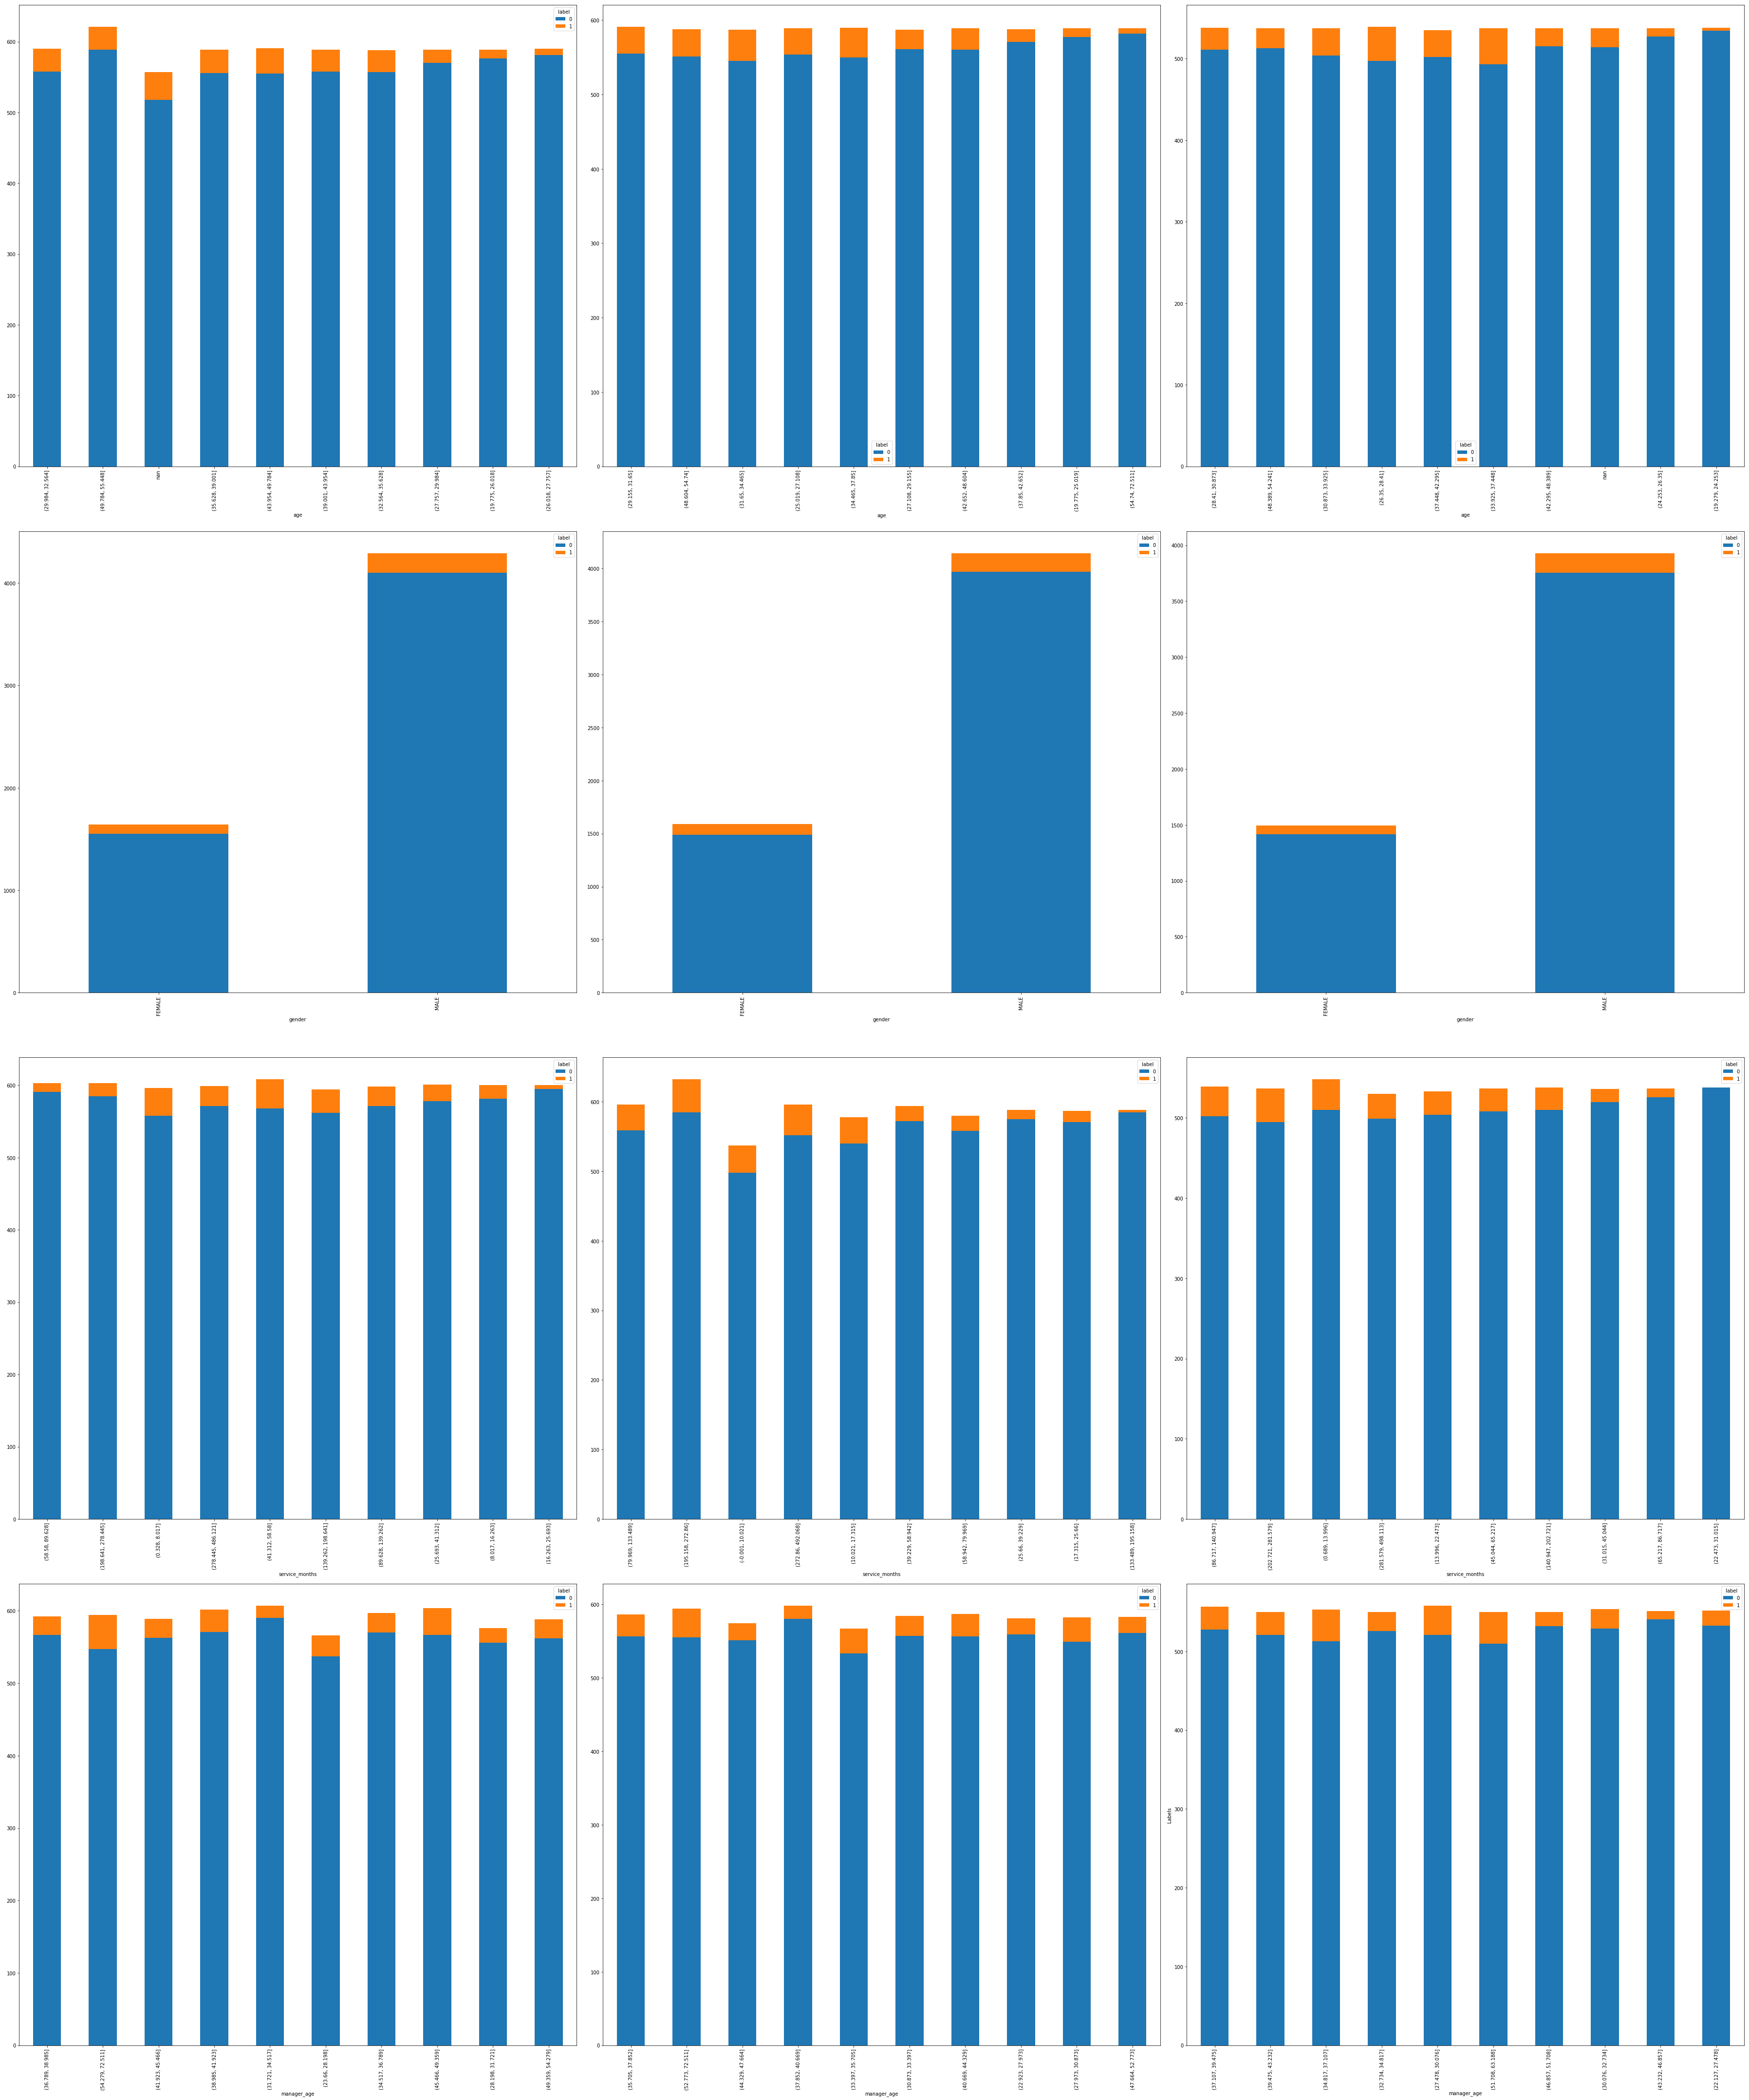

In [147]:
#Set axis objects
fig, ax = plt.subplots(nrows=4, ncols=3,figsize=(50, 60))
df_total =[df1,df2,df3]
ctr=0

all_feats = ['age', 'gender', 'service_months', 'manager_age']

#Iterate for all 3 datasets, for all 12 features selected
for i in range(len(all_feats)):
    for j in range(0,3):
        ix = np.unravel_index(ctr, ax.shape)    # compute an appropriate index (1d or 2d)
        plot_stacked_1(df_total[j],df_total[j][all_feats[i]],df_total[j]['label'],df_total[j][all_feats[i]].name,ix)
        ctr+=1
fig.tight_layout()
plt.savefig("final_distribution")
    #plt.savefig("final")